In [524]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

Bar Chart: Einwohner in ausgewählter Europäischen Ländern im Jahr 2007

* Als erstes wollen wir die Daten laden und anzeigen - Tipp: `pd.read_csv('path/to/csv')`
* Wir sehen einen DataFrame mit dem Inhalt der Datei

In [499]:
gpd = pd.read_csv('./data/gapminder_2007.csv')
print(gpd.head())

       country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
0      Austria    Europe  2007   79.829   8199783  36126.49270       AUT   
1       France    Europe  2007   80.657  61083916  30470.01670       FRA   
2      Germany    Europe  2007   79.406  82400996  32170.37442       DEU   
3        Italy    Europe  2007   80.546  58147733  28569.71970       ITA   
4  Switzerland    Europe  2007   81.701   7554661  37506.41907       CHE   

   iso_num  
0       40  
1      250  
2      276  
3      380  
4      756  


* Erstelle als nächstes einen Barchart, der die Bevölkerungsgrösse (pop) pro Land (country) zeigt.
* Tipp: `gdp.plot.bar(x=, y=)`

<Axes: xlabel='country'>

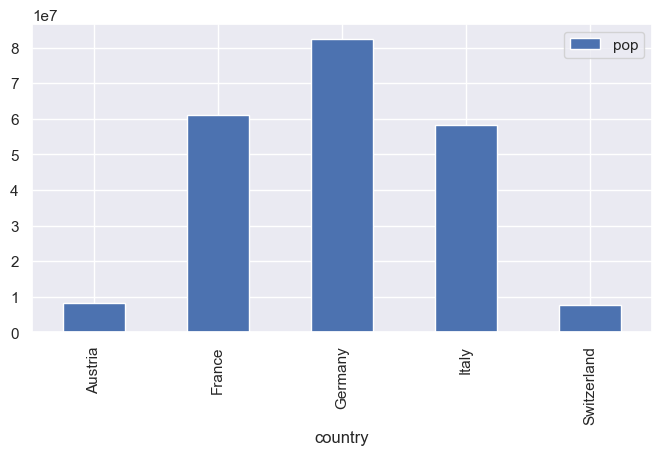

In [500]:
gpd.plot.bar(x='country', y='pop')

* Erstelle den Bar Chart erneut (gleicher Code).
* Füge einen Titel hinzu. Tipp: `plt.title(...)`
* Setze die Beschriftung der X-Achse auf waagerechte Orientierung (rotation=0). Tipp: `plt.xticks(...)`
* Setze die Beschriftung der Y-Achse auf den Format-Stil "plain". Verwende dazu die Funktion `plt.ticklabel_format(axis='y', style='plain')`

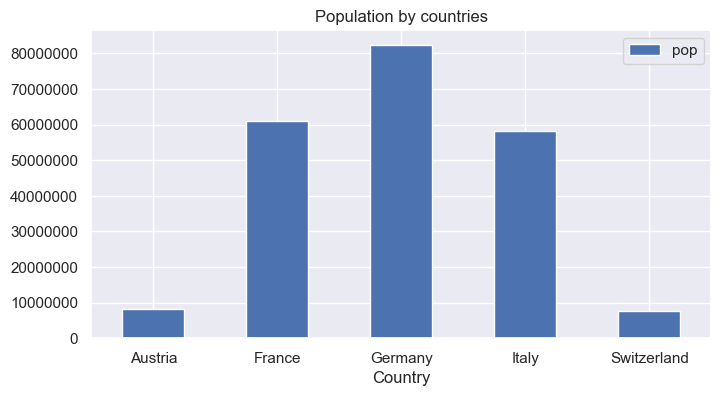

In [509]:
gpd.plot.bar(x='country', y='pop')
plt.title('Population by countries')
plt.xticks(rotation=0)
plt.xlabel('Country')

plt.ticklabel_format(axis='y', style='plain')

plt.show()

* Erstelle den gleichen Chart noch einmal (gleicher Code wie vorhiger Schritt)
* Ändere den Code so, dass er die Funktion `df.plot.barh` verwendet. Was macht das?
* Setze die Rotation der Achsenskalierung auf einen sinnvollen Wert (z.B. 90, 45)

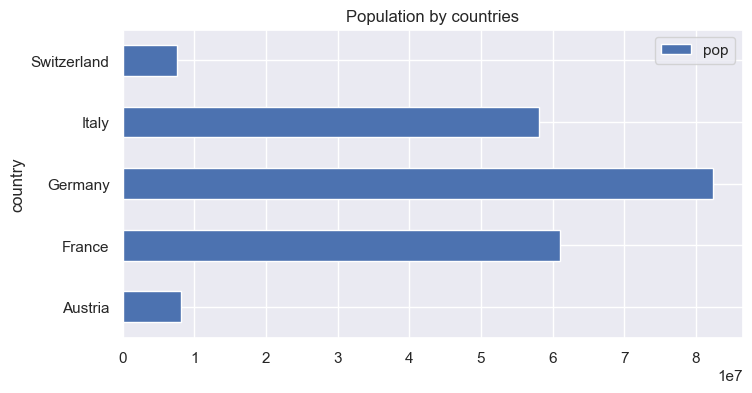

In [515]:
gpd.plot.barh(x='country', y='pop')
plt.title('Population by countries')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

* Erstelle nun einen Pie-Plot mit `df.plot.pie(y=...)`, um die Anteile der Bevölkerung der Länder zu zeigen
* Setze einen Titel und zeige die Legene an. Die Legende ist wahrscheinlich unglücklich platziert. Setze sie oben links und verkleinere die Schrift (Parameter `fontsize=6, loc='upper left'`)
* Dazu müssen wir den `gdp` DataFrame mit einem Index auf die Spalte 'country' versehen: `gdp.set_index(...)`
* Um den % Anteil pro Land innerhalb des Pie-Charts anzuzeigen, verwende bei der Funktion `plot.pie()` den Parameter `autopct='%.2f'`
* Um die % Anteile im Pie Chart kleiner und in weisser Farbe darzustellen, füge den Parameter `{'fontsize': 8, 'color': 'white'}` hinzu

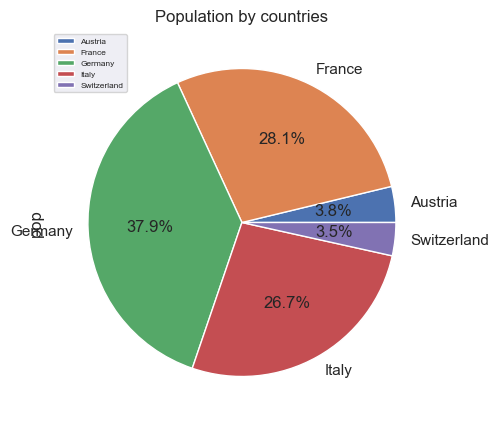

In [520]:
(gpd
  .groupby('country')
  .sum('pop')
  .plot.pie(y='pop', figsize=(5, 5), autopct='%1.1f%%')
)

plt.title('Population by countries')
plt.legend(loc='upper left', fontsize=6)

plt.show()

Lese nun das Dataset ein, um die Wachstumsgrafik zu erstellen.

In [527]:
growth = pd.read_csv('./data/gapminder_growth.csv')
print(growth.head())

   country  year       pop  gdpPercap
0  Austria  1952  1.000000   1.000000
1  Austria  1957  1.005498   1.440849
2  Austria  1962  1.023544   1.215788
3  Austria  1967  1.034662   1.193836
4  Austria  1972  1.022665   1.298180


* Um einen Lineplot zu erzeugen, benötigen wir die Daten im Wide Format.
* Folgendes Script erzeugt einen Pivot-Chart, sodass jede Zeile ein Jahr, jede Spalte ein Land abbildet
* Hier findest Du eine Erklärung zur Funktion `pivot_table()` (vor allem die Grafik ist hilfreich): https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table
* Für den Moment reicht es aus zu wissen, dass wir damit von einem Long-Format (jede Zeile ein Wert) in ein Wide-Format wechseln (jede Zeile mehrere Werte)

In [528]:
wide = (pd.pivot_table(growth, 
                       index='year', 
                       columns='country', 
                       values='pop')
       ) * 100
wide

country,Austria,France,Germany,Italy,Switzerland
year,,,,,
1952,100.000000,100.000000,100.000000,100.000000,100.000000
1957,100.549787,104.359893,102.708932,103.180464,106.458982
1962,102.354397,106.348640,103.830025,103.377658,110.534530
1967,103.466181,105.188439,103.565728,103.587304,107.006707
1972,102.266545,104.363614,103.075399,103.224905,105.581395
1977,100.321161,102.770082,99.293273,103.115356,98.672540
1982,100.081695,102.386054,100.223249,100.849799,102.401707
1987,100.056637,102.198157,99.212401,100.343265,102.810953
1992,104.434230,103.135135,103.705004,100.195919,105.195609


* Plotte nun den `wide` DataFrame als Line Plot. Tipp: `df.plot.line()`
* Füge einen sinnvollen Titel hinzu

<Axes: xlabel='year'>

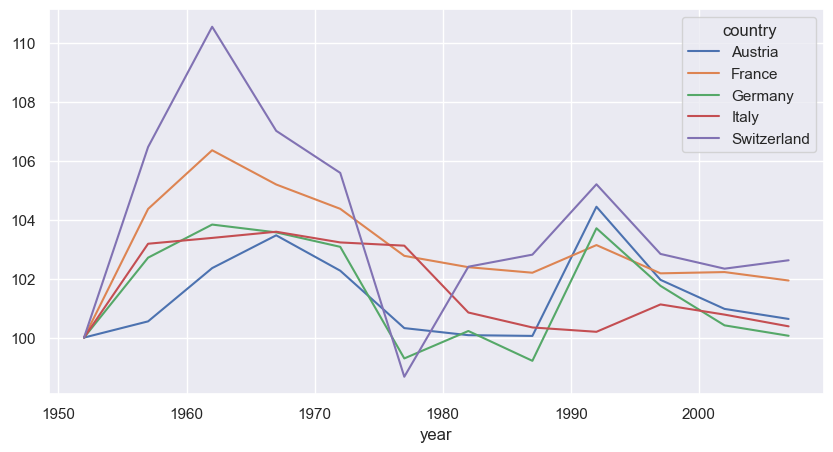

In [530]:
wide.plot.line(figsize=(10, 5))

* Geschafft! Gratulation!

# Create donut plot

In [534]:
df = pd.read_csv('./data/donut_plot.csv')
df.head()

,Platform,Percentage
0,ChatGTP,19.7
1,Jasper Chat,13.4
2,YouChat,12.3
3,DeepL,12.1
4,Perplexity,9.7


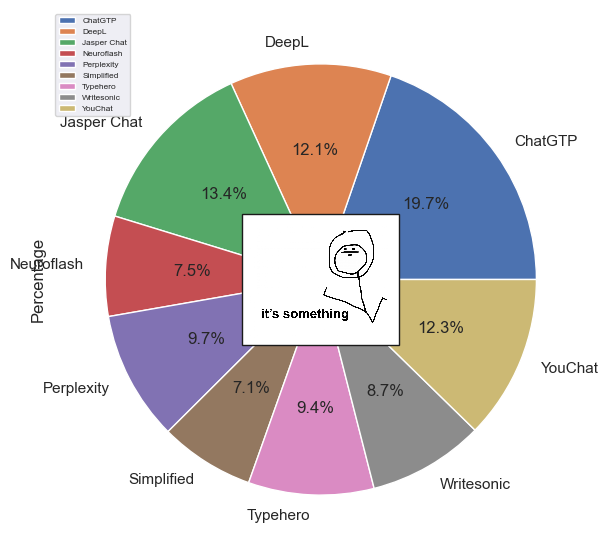

In [543]:
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

(df
  .groupby('Platform')
  .sum('Percentage')
  .plot.pie(y='Percentage', figsize=(7, 7), autopct='%1.1f%%'))

plt.legend(loc='upper left', fontsize=6)

img = mpimg.imread('./data/its_something.jpeg')
imagebox = OffsetImage(img, zoom=0.05)
ab = AnnotationBbox(imagebox, (0.0, 0.0))
plt.gca().add_artist(ab)

plt.show()
